In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
%matplotlib inline

In [20]:
listings = pd.read_csv('./listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [22]:
columns_to_drop = [
    'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
    'space', 'description', 'experiences_offered', 'neighborhood_overview',
    'notes', 'transit', 'access', 'interaction', 'house_rules',
    'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
    'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
    'host_about', 'host_response_time', 'host_response_rate',
    'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url',
    'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
    'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
    'street', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
    'smart_location', 'country_code', 'country', 'is_location_exact',
    'calendar_updated', 'calendar_last_scraped', 'requires_license',
    'license', 'jurisdiction_names', 'instant_bookable',
    'require_guest_profile_picture', 'require_guest_phone_verification', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 
    'cleaning_fee', 'maximum_nights', 'availability_30', 'availability_60', 'cancellation_policy',
    'availability_90', 'first_review', 'last_review', 'review_scores_accuracy', 
    'review_scores_cleanliness', 'review_scores_checkin', 
    'review_scores_communication', 'review_scores_location', 'has_availability', 'market', 'latitude', 'longitude',    
    'review_scores_value', 'calculated_host_listings_count', 'neighbourhood'
]

# Eliminar columnas
listings = listings.drop(columns=columns_to_drop)

In [26]:
listings.head()

,id,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
0,12147973,f,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,1,$0.00,2,0,0,NaN,NaN
1,3075044,f,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,0,$0.00,2,359,36,94.0,1.30
2,6976,t,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,1,$20.00,3,319,41,98.0,0.47
3,1436513,f,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,2,$25.00,1,98,1,100.0,1.00
4,7651065,t,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,1,$0.00,2,334,29,99.0,2.25


In [28]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3585 non-null   int64  
 1   host_is_superhost       3585 non-null   object 
 2   neighbourhood_cleansed  3585 non-null   object 
 3   property_type           3582 non-null   object 
 4   room_type               3585 non-null   object 
 5   accommodates            3585 non-null   int64  
 6   bathrooms               3571 non-null   float64
 7   bedrooms                3575 non-null   float64
 8   beds                    3576 non-null   float64
 9   bed_type                3585 non-null   object 
 10  amenities               3585 non-null   object 
 11  price                   3585 non-null   object 
 12  guests_included         3585 non-null   int64  
 13  extra_people            3585 non-null   object 
 14  minimum_nights          3585 non-null   

In [30]:
# Calcular estadísticas básicas
print("Estadísticas básicas de bathrooms:")
print(listings['bathrooms'].describe())
print("Mediana:", listings['bathrooms'].median())
print("Moda:", listings['bathrooms'].mode()[0])
print("\n")

print("Estadísticas básicas de bedrooms:")
print(listings['bedrooms'].describe())
print("Mediana:", listings['bedrooms'].median())
print("Moda:", listings['bedrooms'].mode()[0])
print("\n")

print("Estadísticas básicas de beds:")
print(listings['beds'].describe())
print("Mediana:", listings['beds'].median())
print("Moda:", listings['beds'].mode()[0])
print("\n")

Estadísticas básicas de bathrooms:
count    3571.000000
mean        1.221647
std         0.501487
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: bathrooms, dtype: float64
Mediana: 1.0
Moda: 1.0


Estadísticas básicas de bedrooms:
count    3575.000000
mean        1.255944
std         0.753060
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: bedrooms, dtype: float64
Mediana: 1.0
Moda: 1.0


Estadísticas básicas de beds:
count    3576.000000
mean        1.609060
std         1.011745
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: beds, dtype: float64
Mediana: 1.0
Moda: 1.0




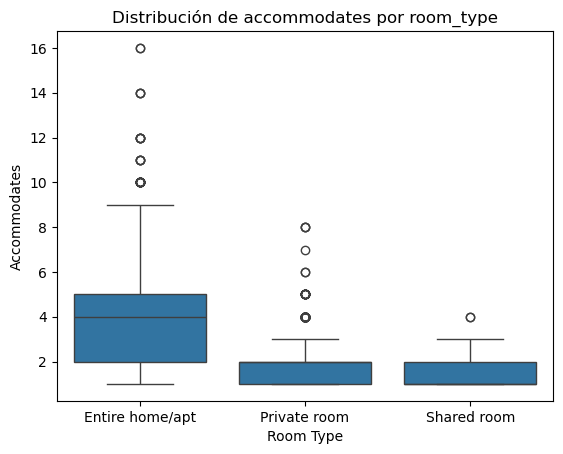

In [32]:
# Gráfico de barras
sns.boxplot(data=listings, x='room_type', y='accommodates')
plt.title('Distribución de accommodates por room_type')
plt.xlabel('Room Type')
plt.ylabel('Accommodates')
plt.show()

In [34]:
# Función para rellenar valores nulos agrupando por 'room_type' y 'accommodates'
def fill_missing_by_group(df, column, group_cols):
    median_values = df.groupby(group_cols)[column].transform('median')
    df[column] = df[column].fillna(median_values)
    return df

# Columnas que quieres rellenar
columns_to_fill = ['bathrooms', 'bedrooms', 'beds']

for col in columns_to_fill:
    listings = fill_missing_by_group(listings, col, group_cols=['room_type', 'accommodates'])

print(listings[columns_to_fill].isnull().sum())

bathrooms    0
bedrooms     0
beds         0
dtype: int64


         bathrooms     bedrooms         beds
count  3585.000000  3585.000000  3585.000000
mean      1.220781     1.255230     1.607531
std       0.500698     0.752129     1.010933
min       0.000000     0.000000     0.000000
25%       1.000000     1.000000     1.000000
50%       1.000000     1.000000     1.000000
75%       1.000000     2.000000     2.000000
max       6.000000     5.000000    16.000000


/var/folders/m_/06pskt392pn6qvkq92krm8xm0000gn/T/ipykernel_1370/3370127732.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(listings['bathrooms'], label='Antes del relleno', shade=True)
/var/folders/m_/06pskt392pn6qvkq92krm8xm0000gn/T/ipykernel_1370/3370127732.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(listings['bathrooms'], label='Después del relleno', shade=True)


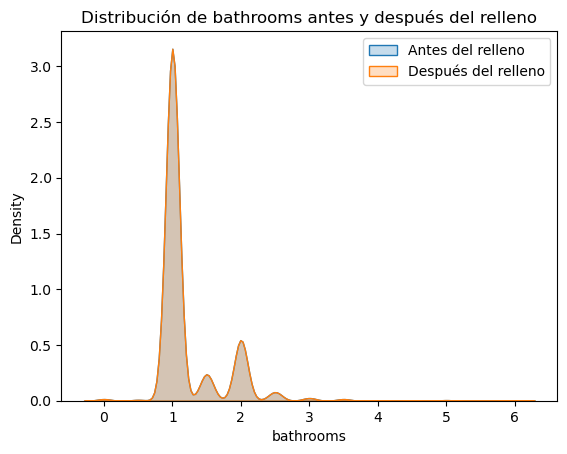

In [38]:
# Ver estadísticas descriptivas después del relleno
print(listings[columns_to_fill].describe())

sns.kdeplot(listings['bathrooms'], label='Antes del relleno', shade=True)
sns.kdeplot(listings['bathrooms'], label='Después del relleno', shade=True)
plt.legend()
plt.title('Distribución de bathrooms antes y después del relleno')
plt.show()

In [261]:
#gracias a esta grafica podemos ver que no hemos introducido sesgos notables en los datos, ya que las curvas son practicamente las mismas

In [42]:
listings['price'] = listings['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [44]:
listings['extra_people'] = listings['extra_people'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [48]:
listings['review_scores_rating'] = listings.groupby('room_type')['review_scores_rating'].transform(lambda x: x.fillna(x.median()))
listings['reviews_per_month'] = listings.groupby('room_type')['reviews_per_month'].transform(lambda x: x.fillna(x.median()))

In [56]:
listings.to_csv('listings_clean.csv', index=False)